# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**AI-Generated Content Disclaimer:** This notebook was generated by an AI model and has not been fully verified. Users should exercise caution when interpreting the code or results and are encouraged to verify critical sections independently.

## Dandiset Overview
This notebook explores Dandiset 001361, titled "A flexible hippocampal population code for experience relative to reward". This dataset contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice, as described in Sosa, Plitt, &amp; Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

You can find the Dandiset on the DANDI Archive at: [https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

## Notebook Contents
This notebook will demonstrate how to:
1. Load the Dandiset using the DANDI API.
2. Access and explore the contents of an NWB file within the Dandiset.
3. Visualize behavioral data (position and speed).
4. Visualize neuronal activity (fluorescence traces).

## Required Packages
This notebook requires the following packages to be installed:
- pynwb
- h5py
- remfile
- dandi
- matplotlib
- numpy

## Loading the Dandiset
We will use the `dandiapi-python` library to connect to the DANDI archive and access the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Exploring an NWB File
This Dandiset contains several NWB files with behavioral and optical physiology data. We will focus on exploring one specific NWB file: `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.

### Loading the NWB file
We will load the NWB file directly from the DANDI archive using its URL.

In [2]:
import pynwb
import h5py
import remfile

# The URL for the selected NWB file asset
nwb_file_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"

# Load the NWB file
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject species: {nwb.subject.species}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session description: processed suite2p data
Session start time: 2023-02-23 00:00:00-08:00
Subject ID: m11
Subject sex: M
Subject species: Mus musculus


### Neurosift Link
You can explore this NWB file interactively on Neurosift using the following link:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&amp;dandisetId=001361&amp;dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&amp;dandisetId=001361&amp;dandisetVersion=draft)

### NWB File Contents Summary
This NWB file contains `acquisition` data including `TwoPhotonSeries` and `processing` modules for `behavior` and `ophys` data.

The `behavior` processing module includes the following `TimeSeries`:
- `Reward`: Reward delivery (mL)
- `autoreward`: Whether trial was automatically rewarded (integer)
- `environment`: Virtual reality environment (AU)
- `lick`: Lick detection (AU)
- `position`: Position in a virtual linear track (cm)
- `reward_zone`: Reward zone entry (binary integer)
- `scanning`: Whether scanning occurred (integer)
- `speed`: Speed of the subject (cm/s)
- `teleport`: End of a trial (integer)
- `trial number`: Trial number (integer)
- `trial_start`: Start of a trial (integer)

The `ophys` processing module includes `Fluorescence`, `ImageSegmentation`, and `Neuropil` data interfaces. The `ImageSegmentation` contains `PlaneSegmentation` with information about identified regions of interest (ROIs), including `pixel_mask`, `iscell`, and `planeIdx`. `Fluorescence` and `Neuropil` contain `RoiResponseSeries` for `plane0` with fluorescence data over time for the ROIs. `Backgrounds_0` contains images like `meanImg` and `max_proj`.

## Visualizing Behavioral Data
Let's visualize the subject's position and speed in the virtual environment over time.

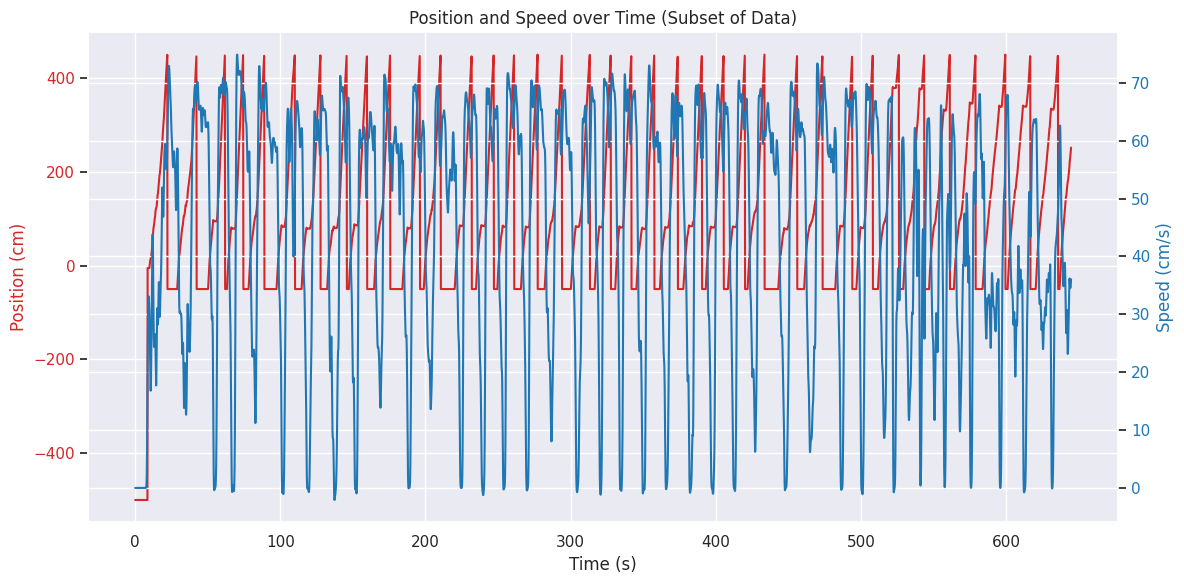

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

# Get position and speed time series
position_ts = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries'].time_series['position']
speed_ts = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries'].time_series['speed']

# Load a subset of data for visualization
subset_size = 10000 # Number of data points to load
position_data = position_ts.data[:subset_size]
speed_data = speed_ts.data[:subset_size]
timestamps_behavior = position_ts.timestamps[:subset_size]

# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (cm)', color=color)
ax1.plot(timestamps_behavior, position_data, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Position and Speed over Time (Subset of Data)')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Speed (cm/s)', color=color)
ax2.plot(timestamps_behavior, speed_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

This plot shows the subject's position and instantaneous speed over the initial part of the recording. You can observe periods of movement (indicated by changes in position and non-zero speed) as well as rapid shifts in position, likely corresponding to teleportation events within the virtual reality task.

## Visualizing Neuronal Activity (Fluorescence Traces)
Now let's look at the fluorescence traces from a few identified ROIs (putative neurons) to see their activity patterns. We will plot the deconvolved fluorescence data.

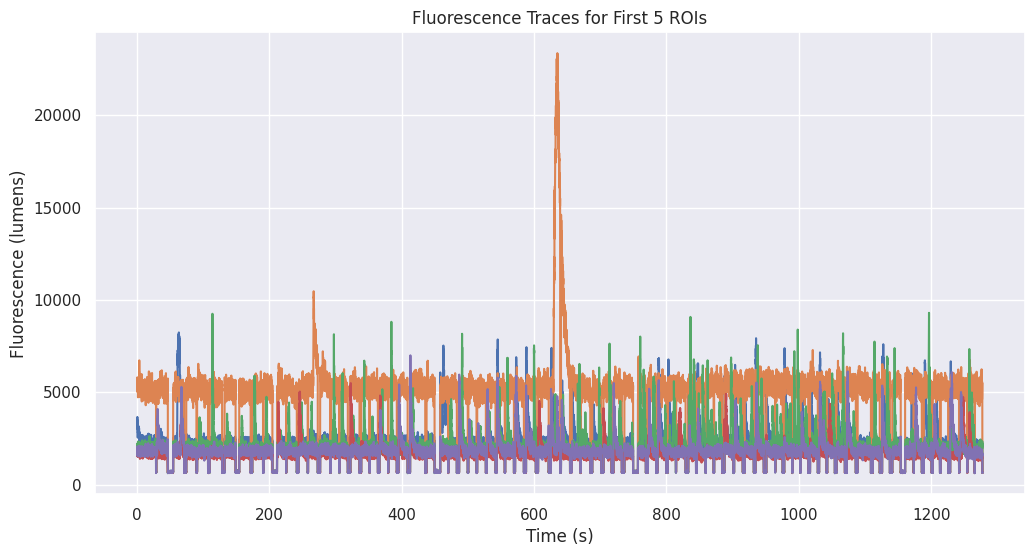

In [4]:
# Get deconvolved fluorescence data
fluorescence_ts = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['plane0']

# Load fluorescence data for a few ROIs
# Select the first 5 ROIs for plotting
n_rois_to_plot = 5
fluorescence_data_subset = fluorescence_ts.data[:, :n_rois_to_plot]

# Generate timestamps for ophys data from the TwoPhotonSeries rate and starting_time
two_photon_series = nwb.acquisition["TwoPhotonSeries"]
rate = two_photon_series.rate
starting_time = two_photon_series.starting_time
num_frames = fluorescence_ts.data.shape[0]
timestamps_ophys = starting_time + np.arange(num_frames) / rate


# Plot fluorescence traces
plt.figure(figsize=(12, 6))
plt.plot(timestamps_ophys, fluorescence_data_subset)
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (lumens)')
plt.title(f'Fluorescence Traces for First {n_rois_to_plot} ROIs')
plt.show()

These traces show the change in fluorescence over time for a few selected ROIs. The sharp upward deflections likely represent calcium transients, which are indicators of neuronal firing. Different ROIs exhibit varying levels and patterns of activity.

## Attempting to Visualize ROI Locations
The `PlaneSegmentation` table contains `pixel_mask` data which should define the spatial extent of each ROI. We attempted to use this data to visualize the ROI locations, for example by plotting their centroids on a background image like the mean intensity projection. However, working with the `pixel_mask` data structure in this file proved challenging with standard methods, leading to errors in extracting pixel coordinates reliably.

## Summary and Future Directions
This notebook demonstrated how to access and load data from Dandiset 001361, explore the structure of an NWB file, and visualize basic behavioral and neural (ophys) data.

Possible future directions for analysis with this Dandiset include:
- Aligning behavioral and neural data in time to investigate neural correlates of behavior.
- Analyzing the activity of more ROIs and exploring relationships between their firing patterns.
- Investigating how neural activity in CA1 relates to the virtual reality environment and reward locations.
- Utilizing other data in the NWB file, such as `Deconvolved` fluorescence, for further analysis.
- Exploring other NWB files in the Dandiset to compare recordings across different sessions or subjects.

In [5]:
# Close the NWB file
io.close()